In [34]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore') # отключим предупреждения Anaconda
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/88/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/88/y.pkl.gz', 'rb'))

print(type(Xdata_numpy["X"]))

#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     Xdata_numpy["X"], Ydata, test_size=0.1428 
)

print( y_train.shape)
# прописываем класс регрессии
from sklearn.base import BaseEstimator
from sklearn.metrics import r2_score
from tensorly.regression.kruskal_regression import KruskalRegressor

class WrappedKruskalRegressor(BaseEstimator):
	def __init__(self, weight_rank = 1, tol = 1e-6, reg_W = 1, n_iter_max = 100):
		self.weight_rank = weight_rank
		self.tol = tol
		self.reg_W = reg_W
		self.n_iter_max = n_iter_max
	
	def fit(self, X, y = None):
		self._model = KruskalRegressor(self.weight_rank, self.tol, self.reg_W, self.n_iter_max)
		self._model.fit(X, y)
		if self._model.n_iterations_ == self.n_iter_max:
			raise Exception('{} did not converge'.format(self))
		return self
	
	def predict(self, X):
		return self._model.predict(X)
	
	def score(self, X, y):
		return r2_score(y, self.predict(X))


#начинаем применять

from sklearn.model_selection import GridSearchCV
regressioModel=WrappedKruskalRegressor()
parametrsNames={'n_iter_max': [10000],
                'reg_W': [4],
                'tol': [1e-07],
                'weight_rank': [1]
               }

gridCought=GridSearchCV(regressioModel, parametrsNames, cv=5)
gridCought.fit(X_train,y_train.iloc[:,0])
predictors=gridCought.predict(X_test)

print(gridCought.best_params_)



<class 'numpy.ndarray'>
(30, 3)

Converged in 1201 iterations

Converged in 626 iterations

Converged in 239 iterations

Converged in 2111 iterations

Converged in 1708 iterations

Converged in 1429 iterations
{'n_iter_max': 10000, 'reg_W': 4, 'tol': 1e-07, 'weight_rank': 1}


In [35]:
print(predictors)

[38.55745196 50.99921082 43.95510836 37.97775635 26.60611008]


In [36]:
print(y_test.iloc[:,0])

34    35.695793
7     44.049334
12    44.546831
26    36.909160
28    21.411182
Name: Gominy, dtype: float64


In [37]:

print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test.iloc[:,0])))

Правильность на тестовом наборе: 0.76


In [38]:
from  sklearn.metrics import  mean_squared_error #среднеквадратичная ошибка
final_mse = mean_squared_error (y_test.iloc[:,0],  predictors) 
final_rmse  =  np.sqrt(final_mse)  
print(final_rmse)

4.122358342503212


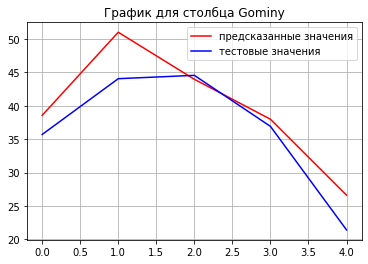

In [39]:
b=[]
for  i in range(0,5):
    b+=[i]
plt.plot(b,predictors,color="red",label="предсказанные значения")
plt.plot(b,y_test.iloc[:,0],color="blue", label="тестовые значения")
plt.legend()
plt.grid(True)
plt.title("График для столбца Gominy")
plt.show();